In [1]:
import tensorflow as tf

physical_devices = tf.config.list_physical_devices('GPU')
if len(physical_devices) > 0:
    print("GPU is available")
    print(physical_devices)
else:
    print("GPU is not available")
    
print(tf.__version__)

GPU is available
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
2.10.1


In [2]:
import numpy as np
import pandas as pd

# load dataset into DataFrame Pandas
# the chosen dataset is the Kaggle : "Sentiment140 dataset with 1.6 million tweets" - contains 1,600,000 tweets extracted using the twitter api
data = pd.read_csv(
    "twitter-sentiment104analysis-kaggle-database.csv",
    encoding="latin-1",
)
data.columns = ["target", "ids", "date", "flag", "user", "text"]
display(data)

,target,ids,date,flag,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...,...
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [3]:
# the kaggle description states that target: the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive) however it looks like there are no neutral values
set(data.target)

{0, 4}

In [4]:
#to classify (positive/negative), we need squash this number in the range [0, 1]
data.target = (data.target).replace(4,1)
pd.set_option('display.max_colwidth', None)
display(data[['target', 'text']])

,target,text
0,0,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!
1,0,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there."
4,0,@Kwesidei not the whole crew
...,...,...
1599994,1,Just woke up. Having no school is the best feeling ever
1599995,1,TheWDB.com - Very cool to hear old Walt interviews! â« http://blip.fm/~8bmta
1599996,1,Are you ready for your MoJo Makeover? Ask me for details
1599997,1,Happy 38th Birthday to my boo of alll time!!! Tupac Amaru Shakur


<Axes: xlabel='target', ylabel='count'>

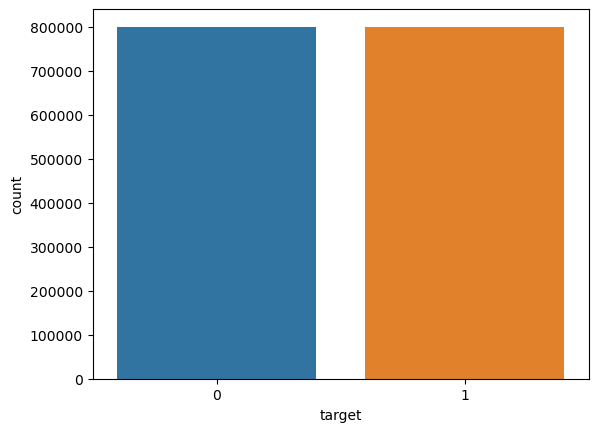

In [5]:
#observing the  distribution of positive(1) / negative(0) sentiments in dataset
#as we will see there is an equal amount of negative tweets to positive ones
import seaborn as sns

sns.countplot(x='target', data=data)

In [6]:
#preprocessing the text this time using the nltk stopwords library
from tools.PreprocessTwt import CustomPreprocess
custom = CustomPreprocess()

tweet = data.columns.values[5]

data['processed_tweet'] = data[tweet].apply(custom.process_tweet)
pd.set_option('display.max_colwidth', None)
display(data[['target', 'text','processed_tweet' ]])

,target,text,processed_tweet
0,0,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!,upset update facebook texting might cry result school today also blah
1,0,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds,dived many times ball managed save rest go bounds
2,0,my whole body feels itchy and like its on fire,whole body feels itchy like fire
3,0,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there.",no not behaving mad see
4,0,@Kwesidei not the whole crew,not whole crew
...,...,...,...
1599994,1,Just woke up. Having no school is the best feeling ever,woke no school best feeling ever
1599995,1,TheWDB.com - Very cool to hear old Walt interviews! â« http://blip.fm/~8bmta,thewdb com cool hear old walt interviews â
1599996,1,Are you ready for your MoJo Makeover? Ask me for details,ready mojo makeover ask details
1599997,1,Happy 38th Birthday to my boo of alll time!!! Tupac Amaru Shakur,happy th birthday boo time tupac amaru shakur


In [7]:
#tokenization
tokenized_tweet = data['processed_tweet'].apply(lambda x: x.split())
tokenized_tweet.head(10)

0    [upset, update, facebook, texting, might, cry, result, school, today, also, blah]
1                          [dived, many, times, ball, managed, save, rest, go, bounds]
2                                              [whole, body, feels, itchy, like, fire]
3                                                        [no, not, behaving, mad, see]
4                                                                   [not, whole, crew]
5                                                                          [need, hug]
6                  [hey, long, time, no, see, yes, rains, bit, bit, lol, fine, thanks]
7                                                                         [nope, didn]
8                                                                         [que, muera]
9                                                [spring, break, plain, city, snowing]
Name: processed_tweet, dtype: object

In [8]:
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [lemmatizer.lemmatize(i) for i in x])
tokenized_tweet.head(10)

0    [upset, update, facebook, texting, might, cry, result, school, today, also, blah]
1                            [dived, many, time, ball, managed, save, rest, go, bound]
2                                               [whole, body, feel, itchy, like, fire]
3                                                        [no, not, behaving, mad, see]
4                                                                   [not, whole, crew]
5                                                                          [need, hug]
6                   [hey, long, time, no, see, yes, rain, bit, bit, lol, fine, thanks]
7                                                                         [nope, didn]
8                                                                         [que, muera]
9                                                [spring, break, plain, city, snowing]
Name: processed_tweet, dtype: object

In [9]:
data['processed_tweet'] = tokenized_tweet
display(data)

,target,ids,date,flag,user,text,processed_tweet
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!,"[upset, update, facebook, texting, might, cry, result, school, today, also, blah]"
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds,"[dived, many, time, ball, managed, save, rest, go, bound]"
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,"[whole, body, feel, itchy, like, fire]"
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there.","[no, not, behaving, mad, see]"
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew,"[not, whole, crew]"
...,...,...,...,...,...,...,...
1599994,1,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best feeling ever,"[woke, no, school, best, feeling, ever]"
1599995,1,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interviews! â« http://blip.fm/~8bmta,"[thewdb, com, cool, hear, old, walt, interview, â]"
1599996,1,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me for details,"[ready, mojo, makeover, ask, detail]"
1599997,1,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! Tupac Amaru Shakur,"[happy, th, birthday, boo, time, tupac, amaru, shakur]"


In [10]:
from sklearn.model_selection import train_test_split
#split the data in testing and training
y = data['target']
X = data['processed_tweet']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=8)

In [11]:
print(f"Training set length: {len(X_train)/1e6}M examples")
print(f"Test set length: {len(X_test)/1e6}M examples")

Training set length: 1.439999M examples
Test set length: 0.16M examples


In [12]:
#preparing embedding layer - converts our textual data into numeric form - used as the first layer for the deep learning models in Keras
from keras.preprocessing.text import Tokenizer
from keras import distribute
from keras import models
from keras.engine.input_layer import Input
from keras.engine.sequential import Sequential

word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(X_train)
word_tokenizer.fit_on_texts(X_test)
X_train = word_tokenizer.texts_to_sequences(X_train)
X_test = word_tokenizer.texts_to_sequences(X_test)


In [13]:
print(f"Word index length: {len(word_tokenizer.word_index)}")
print(f"Some words: {list(word_tokenizer.word_index.keys())[0:10]}")

Word index length: 239321
Some words: ['day', 'not', 'good', 'get', 'like', 'go', 'no', 'today', 'work', 'love']


In [14]:
# Initialize the max length to the first tweet length
max_length = len(str(data['processed_tweet'][0]).split())

# Loop through the tweets
for tweet in data['processed_tweet']:
    # Convert tweet to string
    tweet_str = str(tweet)
    # Get each tweet's length
    length = len(tweet_str.split())
    # Update the max length if greater
    if length > max_length:
        max_length = length

print(f"Maximum token length: {max_length}")


Maximum token length: 118


In [15]:
from keras_preprocessing.sequence import pad_sequences

# padding all reviews to fixed length 100

X_train = pad_sequences(X_train, padding='post', maxlen=max_length)
X_test = pad_sequences(X_test, padding='post', maxlen=max_length)

In [16]:
# adding 1 to store dimensions for words for which no pretrained word embeddings exist
vocab_size = len(word_tokenizer.word_index) + 1
vocab_size

239322

In [17]:
# load GloVe word embeddings and create an Embeddings Dictionary
# the embeddings were trained on a large corpus and that each word vector has a dimensionality of 100
# Global Vectors for Word Representation - supervised learning algorithm that produces word embeddings by leveraging global statistics of word co-occurrence
from numpy import asarray
from numpy import zeros

embeddings_dictionary_glove = dict()
glove_file = open('glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = np.asarray(records[1:], dtype='float32')
    embeddings_dictionary_glove[word] = vector_dimensions
glove_file.close()

In [18]:
# create Embedding Matrix having 100 columns 
# containing 100-dimensional GloVe word embeddings for all words in our corpus.

embedding_matrix = np.zeros((vocab_size, 100))
for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary_glove.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

embedding_matrix.shape

(239322, 100)

In [19]:
# Recurrent Neural Network (LSTM)
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import Sequential
from keras.layers import Flatten, GlobalMaxPooling1D, Embedding, Conv1D, LSTM, Bidirectional
from keras.layers.core import Activation, Dropout, Dense
from keras.optimizers import Adam

# NN architecture

embedding_layer = Embedding(
    input_dim=vocab_size,
    output_dim=100,  # Specify the dimensionality of the output embeddings
    input_length=max_length,
    weights=[embedding_matrix],
    trainable=False
)


lstm_model = Sequential([
        embedding_layer,
        tf.keras.layers.Bidirectional(LSTM(units=128, return_sequences=True)),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Bidirectional(LSTM(units=128, return_sequences=True)),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Bidirectional(LSTM(units=128)),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dense(1, activation="sigmoid"),
    ])

lstm_model.compile(
       optimizer = Adam(learning_rate=0.001),
       loss="binary_crossentropy", 
       metrics=["accuracy"]
  )

lstm_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 118, 100)          23932200  
                                                                 
 bidirectional (Bidirectiona  (None, 118, 256)         234496    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 118, 256)          0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 118, 256)         394240    
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 118, 256)          0         
                                                                 
 bidirectional_2 (Bidirectio  (None, 256)              3

In [20]:
#es = EarlyStopping(monitor='val_accuracy', patience=3, verbose=0)
es = tf.keras.callbacks.EarlyStopping(
    monitor="val_accuracy", 
    patience=10, 
    mode ="max", 
    verbose=2, 
    restore_best_weights=True
)

In [21]:
# model Training
lstm_model_history = lstm_model.fit(X_train, y_train, batch_size=248, epochs=20, verbose=1, validation_split=0.1, callbacks=[es]) #, callbacks=[es]

Epoch 1/20


c:\Users\Mara Sofia\anaconda3\envs\ML\lib\site-packages\keras\engine\data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


5226/5226 [==============================] - 534s 101ms/step - loss: 0.4722 - accuracy: 0.7734 - val_loss: 0.4439 - val_accuracy: 0.7924
Epoch 2/20
5226/5226 [==============================] - 519s 99ms/step - loss: 0.4325 - accuracy: 0.7987 - val_loss: 0.4261 - val_accuracy: 0.8018
Epoch 3/20
5226/5226 [==============================] - 518s 99ms/step - loss: 0.4170 - accuracy: 0.8077 - val_loss: 0.4204 - val_accuracy: 0.8054
Epoch 4/20
5226/5226 [==============================] - 533s 102ms/step - loss: 0.4053 - accuracy: 0.8143 - val_loss: 0.4166 - val_accuracy: 0.8082
Epoch 5/20
5226/5226 [==============================] - 529s 101ms/step - loss: 0.3944 - accuracy: 0.8202 - val_loss: 0.4155 - val_accuracy: 0.8085
Epoch 6/20
5226/5226 [==============================] - 522s 100ms/step - loss: 0.3844 - accuracy: 0.8256 - val_loss: 0.4153 - val_accuracy: 0.8085
Epoch 7/20
5226/5226 [==============================] - 524s 100ms/step - loss: 0.3812 - accuracy: 0.8273 - val_loss: 0.4173 

In [22]:
# predictions on the Test Set
score = lstm_model.evaluate(X_test, y_test, verbose=0)

In [23]:
# model Performance
print("Test Score(Loss):", score[0])
print("Test Accuracy:", score[1])
#Test Accuracy: 0.7076281309127808 - without removing stop words and contradictions - split 0.2
#Test Accuracy: 0.7054093480110168  -with removed stop words and applied contradictions - split 0.2
#Test Accuracy: 0.8078187704086304  - with removed stop words and applied contradictions - split 0.1

Test Score(Loss): 0.4182398319244385
Test Accuracy: 0.8078187704086304


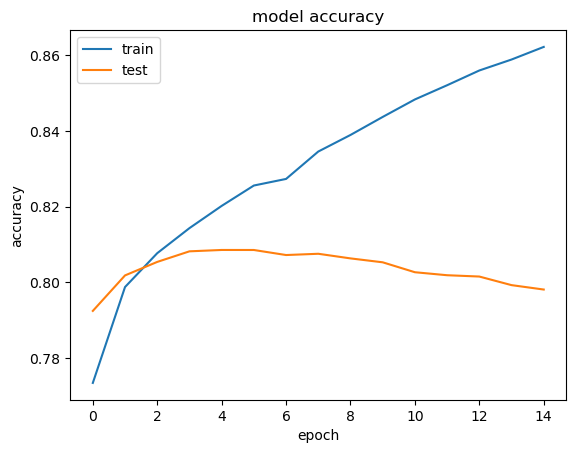

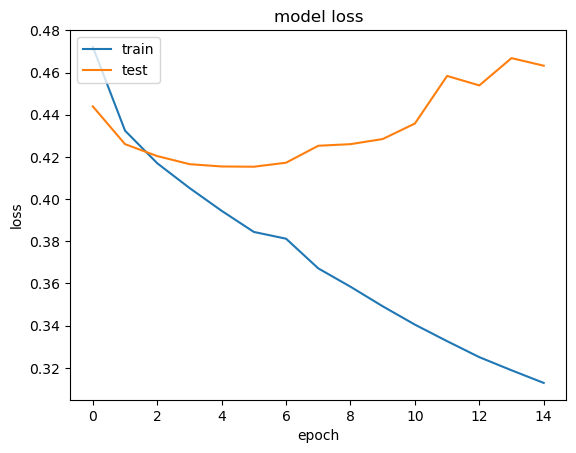

In [24]:
# model Performance Charts

import matplotlib.pyplot as plt

plt.plot(lstm_model_history.history['accuracy'])
plt.plot(lstm_model_history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(lstm_model_history.history['loss'])
plt.plot(lstm_model_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [25]:
from sklearn.metrics import classification_report

y_pred = lstm_model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)  # Assuming a threshold of 0.5 for binary classification
classification_rep = classification_report(y_test, y_pred_binary)
print(classification_rep)

5000/5000 [==============================] - 125s 25ms/step
              precision    recall  f1-score   support

           0       0.81      0.80      0.81     80161
           1       0.80      0.81      0.81     79839

    accuracy                           0.81    160000
   macro avg       0.81      0.81      0.81    160000
weighted avg       0.81      0.81      0.81    160000



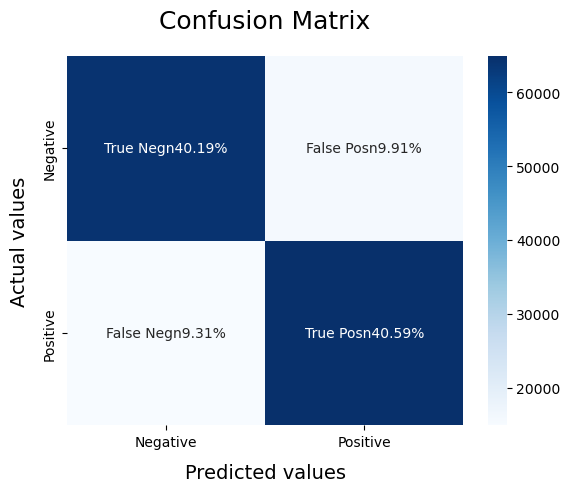

In [26]:
# Compute and plot the Confusion matrix

from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, y_pred_binary)
categories = ['Negative', 'Positive']
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)
sns.heatmap(cf_matrix, annot=labels, cmap='Blues', fmt='',
            xticklabels=categories, yticklabels=categories)
plt.xlabel("Predicted values", fontdict={'size': 14}, labelpad=10)
plt.ylabel("Actual values", fontdict={'size': 14}, labelpad=10)
plt.title("Confusion Matrix", fontdict={'size': 18}, pad=20)

plt.show()

In [27]:
# save the model
# Setup the vocabulary
vocabulary = list(word_tokenizer.word_index.keys())

In [44]:
# Get the input shape
input_shape = tf.keras.Input(shape=(max_length))
shape = input_shape.shape
print(f"Model input shape: {shape}")

Model input shape: (None, 118)


In [45]:
from keras.layers import TextVectorization

# Create the text vectorization layer
vectorize_layer = TextVectorization (
    # Standardization to apply to the input text
    standardize="lower_and_strip_punctuation",
    # Maximum size of the vocabulary for this layer
    max_tokens=vocab_size+1,
    # Output of the layer 
    output_mode="int",
    output_sequence_length=max_length, 
    vocabulary=vocabulary
)

#Adapt to our training content
#vectorize_layer.adapt(X_train)
#ValueError: When using `TextVectorization` to tokenize strings, the input rank must be 1 or the last shape dimension must be 1. Received: inputs.shape=(None, 118) with rank=2

#X_train = np.reshape(X_train, (-1,))
#vectorize_layer.adapt(X_train)

In [46]:
export_model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(1,), dtype=tf.string),
    vectorize_layer,
    lstm_model,
    tf.keras.layers.Activation("sigmoid")
])

In [48]:
export_model.compile(
       optimizer = Adam(learning_rate = 0.001),
       loss="binary_crossentropy", 
       metrics=["accuracy"]
)

In [49]:
export_model.save("lstm_model.h5")

In [50]:
import pickle

with open("vocabulary.pkl", "wb") as f:
    pickle.dump(vocabulary, f)